In [9]:
import os
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.ndimage import gaussian_filter

# 🔹 1. Set working directory
os.chdir(r'C:\Users\hoyi\Code\spatchat')  # ✅ Change this path if needed
print("Working directory set to:", os.getcwd())

# 🔹 2. Raster dimensions and smoothing
width, height = 100, 100
noise = np.random.rand(height, width)
smoothed = gaussian_filter(noise, sigma=3)  # Controls patchiness

# 🔹 3. Reclassify into 3 classes based on percentiles
thresholds = np.percentile(smoothed, [60, 90])
dummy_data = np.zeros_like(smoothed)
dummy_data[smoothed <= thresholds[0]] = 1
dummy_data[(smoothed > thresholds[0]) & (smoothed <= thresholds[1])] = 2
dummy_data[smoothed > thresholds[1]] = 3

# 🔹 4. Define GeoTIFF metadata (including nodata)
transform = from_origin(0, 1000, 10, 10)
raster_meta = {
    'driver': 'GTiff',
    'height': height,
    'width': width,
    'count': 1,
    'dtype': 'uint8',
    'crs': 'EPSG:32633',
    'transform': transform,
    'nodata': 0  # ✅ Important for PyLandStats
}

# 🔹 5. Save the raster to file
output_path = 'dummy_lulc.tif'
with rasterio.open(output_path, 'w', **raster_meta) as dst:
    dst.write(dummy_data.astype(np.uint8), 1)


Working directory set to: C:\Users\hoyi\Code\spatchat


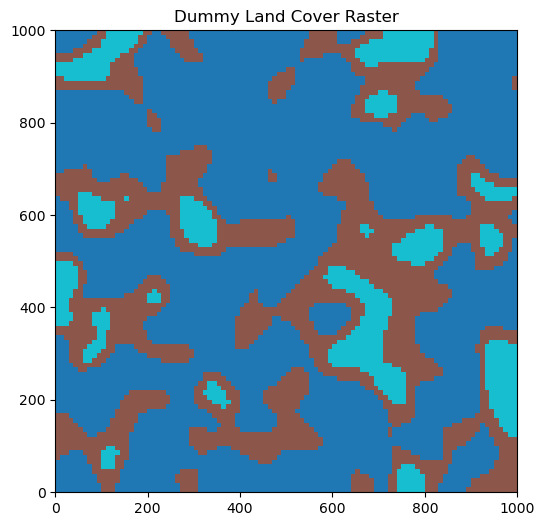

In [10]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load your raster file
with rasterio.open('dummy_lulc.tif') as src:
    fig, ax = plt.subplots(figsize=(6, 6))
    show(src, ax=ax, cmap='tab10')  # tab10 gives distinct colors for classes
    ax.set_title("Dummy Land Cover Raster")
    plt.show()


In [11]:
from pylandstats import Landscape

landscape = Landscape('dummy_lulc.tif')
metrics = landscape.compute_landscape_metrics_df()
print(metrics)


   total_area  number_of_patches  patch_density  largest_patch_index  \
0       100.0                 41           41.0                57.26   

   total_edge  edge_density  total_core_area  number_of_disjunct_core_areas  \
0     19330.0         193.3             69.8                             64   

   landscape_shape_index  effective_mesh_size  ...  \
0                 5.8325            34.538896  ...   

   euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
0                           50.0                     221.715729   

   euclidean_nearest_neighbor_sd  euclidean_nearest_neighbor_cv  \
0                      54.855409                      79.373574   

   disjunct_core_area_mn  disjunct_core_area_am  disjunct_core_area_md  \
0               1.090625              12.192934                   0.12   

   disjunct_core_area_ra  disjunct_core_area_sd  disjunct_core_area_cv  
0                  46.81               5.801336             531.927658  

[1 rows x 71 columns]

In [12]:
landscape.compute_class_metrics_df()


,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,core_area_proportion_of_landscape,number_of_disjunct_core_areas,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,60.0,60.0,7,7.0,57.26,13510.0,135.1,48.35,48.35,6,...,40.000000,61.715729,20.109597,47.269097,8.058333,45.353078,0.36,46.80,17.335901,215.130112
2,30.0,30.0,16,16.0,10.47,19330.0,193.3,15.83,15.83,40,...,35.811388,117.317927,29.729018,63.967618,0.395750,2.091226,0.08,4.74,0.819136,206.983297
3,10.0,10.0,18,18.0,2.29,5820.0,58.2,5.62,5.62,18,...,60.827625,218.377223,65.222433,65.509004,0.312222,0.738826,0.15,1.50,0.364959,116.890779


In [13]:
landscape.compute_patch_metrics_df()


,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,core_area,number_of_core_areas,core_area_index,euclidean_nearest_neighbor
patch_id,,,,,,,,,,
0,1,0.34,280.0,823.529412,1.166667,1.044944,0.14,1,41.176471,90.000000
1,1,57.26,14060.0,245.546629,4.625000,1.231684,46.82,1,81.767377,28.284271
2,1,0.14,180.0,1285.714286,1.125000,1.050951,0.02,1,14.285714,30.000000
3,1,0.04,100.0,2500.000000,1.250000,1.074487,0.00,0,0.000000,40.000000
4,1,0.51,320.0,627.450980,1.066667,1.026597,0.30,1,58.823529,41.231056
5,1,1.01,560.0,554.455446,1.333333,1.071906,0.65,1,64.356436,28.284271
6,1,0.70,380.0,542.857143,1.117647,1.028699,0.42,1,60.000000,40.000000
7,2,0.26,360.0,1384.615385,1.636364,1.144514,0.03,1,11.538462,40.000000
8,2,0.91,800.0,879.120879,2.000000,1.162418,0.33,2,36.263736,28.284271


In [14]:
landscape.compute_landscape_metrics_df().to_csv('landscape_metrics.csv', index=False)
